# **7-3 인공 신경망 기반 강화학습 — DQN**

CartPole-v1 환경

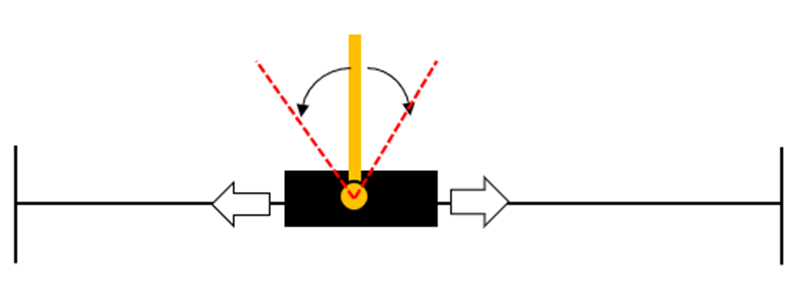

📌[실습 07-21] 라이브러리 불러오기

In [ ]:
!pip install koreanize_matplotlib # 한글 그래프 폰트 설치
import koreanize_matplotlib
import numpy as np; import matplotlib.pyplot as plt
import gymnasium as gym      # 환경 시뮬레이터

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 80.4 MB/s eta 0:00:00


📌[실습 07-22] CartPole 환경 설정하기

In [ ]:
# 환경 생성 및 설정하기
env = gym.make("CartPole-v1", render_mode="rgb_array")   # 환경 정의 및 시각화 설정하기
env = gym.wrappers.TimeLimit(env, max_episode_steps=100)    # 최대 스텝 수 설정하기

# 상태 초기화하기
상태, _ = env.reset()
print("초기 상태:", 상태)

초기 상태: [ 0.01049596 -0.01866262  0.01102568  0.02273979]


📌[실습 07-23] 무작위 행동으로 상태 변화와 보상 관찰하기

In [ ]:
상태, _ = env.reset()

for step in range(100):
  행동=np.random.randint(0, 2)  # 0 또는 1 무작위
  상태, 보상, terminated, truncated, _ = env.step(행동)
  종료=terminated or truncated
  print(f"스텝= {step:2}  | 행동={행동} | 상태={상태} | 보상={보상} | 종료={종료}")
  if 종료:
        break

스텝=  0  | 행동=1 | 상태=[ 0.01597219  0.19302735  0.03073986 -0.2968599 ] | 보상=1.0 | 종료=False
스텝=  1  | 행동=0 | 상태=[ 0.01983274 -0.00251903  0.02480266  0.00535717] | 보상=1.0 | 종료=False
스텝=  2  | 행동=0 | 상태=[ 0.01978236 -0.19798775  0.0249098   0.3057613 ] | 보상=1.0 | 종료=False
스텝=  3  | 행동=0 | 상태=[ 0.0158226  -0.39345565  0.03102503  0.6061949 ] | 보상=1.0 | 종료=False
스텝=  4  | 행동=1 | 상태=[ 0.00795349 -0.19878094  0.04314893  0.32344326] | 보상=1.0 | 종료=False
스텝=  5  | 행동=0 | 상태=[ 0.00397787 -0.39448988  0.04961779  0.62941533] | 보상=1.0 | 종료=False
스텝=  6  | 행동=1 | 상태=[-0.00391193 -0.2000942   0.0622061   0.35276228] | 보상=1.0 | 종료=False
스텝=  7  | 행동=1 | 상태=[-0.00791381 -0.00590943  0.06926134  0.08032531] | 보상=1.0 | 종료=False
스텝=  8  | 행동=1 | 상태=[-0.008032    0.18815482  0.07086785 -0.18972656] | 보상=1.0 | 종료=False
스텝=  9  | 행동=0 | 상태=[-0.0042689  -0.00790567  0.06707332  0.12444369] | 보상=1.0 | 종료=False
스텝= 10  | 행동=1 | 상태=[-0.00442702  0.18619445  0.0695622  -0.14634705] | 보상=1.0 | 종료=False
스텝= 11  | 

📌[실습 07-24] 상태 시각화하기

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
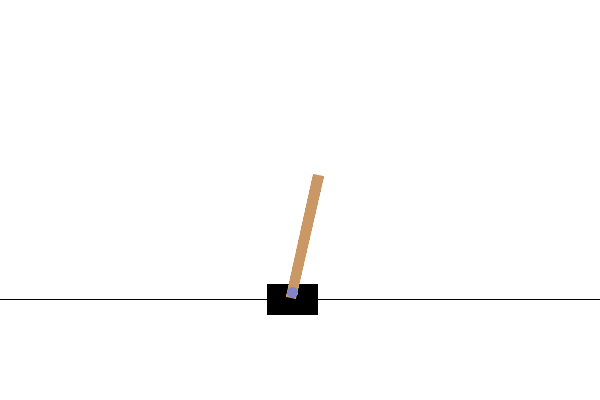

In [ ]:
frame = env.render()
frame

📌[실습 07-25] 상태 변화 과정을 GIF 형태로 제작하기

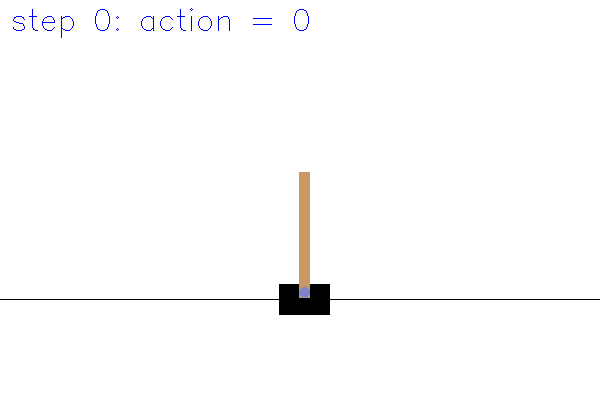

In [ ]:
import imageio; import cv2; from IPython.display import Image

# 환경 생성
env= gym.make("CartPole-v1", render_mode="rgb_array")
env= gym.wrappers.TimeLimit(env, max_episode_steps=100)
상태,_ = env.reset()

frames=[]

# 랜덤 행동을 수행하면서 프레임 수집
for step in range(100):
    행동=env.action_space.sample()
    상태, 보상, terminated, truncated, _ = env.step(행동)
    종료=terminated or truncated

    frame=env.render()  # 그림을 frame 변수에 저장
    frame=frame.copy()  # 꼭 복사해야 모든 프레임이 보존됨

    # ==== OpenCV로 텍스트 삽입 ====
    텍스트_삽입=cv2.putText(
        frame.copy(),  # 원본 이미지 복사
        f"step {step}: action = {행동}",
        org=(10, 30),  # 텍스트 위치
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=1,color=(0, 0, 255),thickness=1
    )
    frames.append(텍스트_삽입)

    if 종료:
        break
env.close()

# GIF 형태로 저장하고 출력하기
imageio.mimsave("cartpole.gif", frames, duration=0.2)
Image(filename="cartpole.gif")


📌[실습 07-26] 카트폴 환경 및 예측 모델과 타깃 모델 설정하기

In [ ]:
# 라이브러리 설치
import numpy as np; import random; import gymnasium as gym
from gymnasium.wrappers import TimeLimit; import tensorflow as tf
from tensorflow.keras.models import Sequential, clone_model, load_model
from tensorflow.keras.layers import Dense; from collections import deque
import warnings; warnings.filterwarnings('ignore')
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

# 환경 생성
env = gym.make("CartPole-v1")                  # render_mode 끔
env = TimeLimit(env, max_episode_steps=100)    # 최대 스텝 제한
n_actions=2
n_states=4

storage = deque(maxlen=2000)
min_step = 50; min_penalty=-100

# 하이퍼 파라미터
gamma = 0.99
e = 1; e_decay = 0.99; e_min=0.1
n_sample=128
n_episodes=500
TAU = 0.005

# 예측 모델 생성
pred_model=Sequential()
pred_model.add(Dense(16, input_dim=n_states, activation="relu"))
pred_model.add(Dense(8, activation="relu"))
pred_model.add(Dense(2, activation='linear'))
#pred_model.compile(loss="mse", optimizer="adam")
pred_model.compile(loss=Huber(), optimizer=Adam(learning_rate=0.001))

# 타깃 모델 생성
target_model=clone_model(pred_model)    # 예측_모델과 동일한 구조로 설정
target_model.set_weights(pred_model.get_weights())    # 예측_모델 파라미터와 동기화

최근_보상 = deque(maxlen=5)    # 최근 보상 저장(5개)
스텝_저장=[ ]


📌[실습 07-27] 타깃 모델 소프트 업데이트 함수 설정하기
* 메인 학습 루프 이전에 설정

In [ ]:
def soft_update(target_model, pred_model, tau):
    t_weights = target_model.get_weights() # 타깃_모델의 가중치
    p_weights = pred_model.get_weights()   # 예측_모델의 가중치

    new_weights = []
    for tw, ow in zip(t_weights, p_weights):
        nw = (1 - tau) * tw + tau * ow
        new_weights.append(nw)
    target_model.set_weights(new_weights) # 업데이트 완료


📌탐험과 활용 전략에 따른 행동 선택을 텐서로 처리하는 함수
* 메인 학습 루프 이전에 설정

In [ ]:
@tf.function
def select_action_tf(state, epsilon, pred_model, n_actions):
    state_tensor = tf.expand_dims(tf.cast(state, dtype=tf.float32), axis=0)
    q_values = pred_model(state_tensor)

    best_action = tf.argmax(q_values, axis=1, output_type=tf.int32)[0]

    random_action = tf.random.uniform(shape=(), maxval=n_actions, dtype=tf.int32)

    action = tf.where(
        tf.random.uniform(shape=()) < epsilon, random_action, best_action)
    return action

### 메인 학습 루프: 경험 데이터를 수집하고 파라미터를 업데이트하기
📌 [실습 7-28, 7-29, 7-30, 7-31]

In [ ]:
# 📌[실습 07-28] 1단계: 경험을 통한 데이터 수집

for ep in range(n_episodes):
    상태, _ = env.reset()    # 에피소드마다 상태를 무작위로 초기화
    steps=0; 총_보상= 0; 종료=False

    while not 종료:   # 종료=True가 될 때까지 경험 반복
        #if np.random.rand() <= e:    # 탐험
        #    행동 = np.random.randint(0, 2)
        #else:                        # 활용
        #    Q = pred_model.predict(np.array([상태]), verbose=0)  # 예측_모델로 예측된 Q값 사용
        #    행동 = np.argmax(Q)
        행동 = select_action_tf(상태, e, pred_model, n_actions).numpy()
        다음_상태, 보상, terminated, truncated, _ = env.step(행동)
        종료=terminated or truncated
        steps += 1

# 📌[실습 07-29] ] 2단계: 조기 종료 벌칙 및 경험 데이터 저장하기

        # 조기_실패 시 벌칙 부여
        if terminated and (steps < min_step):
            보상=보상 + min_penalty # 환경의 기본 보상에 조기_실패 벌칙을 더해 줌
        # 경험 저장
        storage.append((상태, 행동, 보상, 다음_상태, 종료))
        총_보상 =총_보상 + 보상

# 📌[실습 07-30] 3단계: 경험 리플레이 학습하기
        if len(storage) > n_sample:
            학습_데이터 = random.sample(storage, n_sample)
            상태_벡터, 행동_벡터, 보상_벡터, 다음_상태_벡터, 종료_벡터 = zip(*학습_데이터)
            상태_벡터 = np.array(상태_벡터); 행동_벡터 = np.array(행동_벡터); 보상_벡터 = np.array(보상_벡터)
            다음_상태_벡터 = np.array(다음_상태_벡터); 종료_벡터 = np.array(종료_벡터)

            # 1) 상태별 모든 행동의 Q값 예측
            Q_target=pred_model.predict(상태_벡터, verbose=0)

            # 선택된 행동의 Q값 업데이트

            # 2) 예측_모델로 다음 상태의 최적 행동 a_next 선택
            Q_next=pred_model.predict(다음_상태_벡터, verbose=0)
            a_next=np.argmax(Q_next, axis=1)

            # 3) 타깃 모델로 다음 상태 최적 행동의 Q 값 평가
            Q_target_next=target_model.predict(다음_상태_벡터, verbose=0)
            max_q_value=Q_target_next[np.arange(n_sample), a_next]

            # 4) 선택된 행동의 Q값 업데이트
            Q_target[np.arange(n_sample), 행동_벡터]=보상_벡터 + gamma * max_q_value * (~종료_벡터)

            # 5) 신경망 파라미터 업데이트
            pred_model.fit(상태_벡터, Q_target, batch_size=n_sample, epochs=1, verbose=0)

            # 6) 타깃_모델 Soft Update
            soft_update(target_model, pred_model, TAU)
        상태 = 다음_상태

# 📌[실습 07-31] 4단계: 결과를 출력하고 조기 종료 판정하기

    e=max(e_min, e * e_decay)    # 다음 에피소드의 탐험 비율 설정

    # 결과 출력
    최근_보상.append(총_보상); 최근_보상_평균 = np.mean(최근_보상)
    print(f"에피소드={ep:3} | e= {e:.3f} | 총_보상={총_보상:6} | 유지_스텝_수={steps:2}")
    스텝_저장.append(steps)

    # DDQN 조기 종료 판단
    if 최근_보상_평균 >= 95:
        print("**조기 종료 조건 달성**")
        break    # 반복문 탈출
pred_model.save('학습_모델_100.keras')   # 학습 완료된 모델 저장

에피소드=  0 | e= 0.990 | 총_보상= -84.0 | 유지_스텝_수=16
에피소드=  1 | e= 0.980 | 총_보상= -85.0 | 유지_스텝_수=15
에피소드=  2 | e= 0.970 | 총_보상= -73.0 | 유지_스텝_수=27
에피소드=  3 | e= 0.961 | 총_보상= -75.0 | 유지_스텝_수=25
에피소드=  4 | e= 0.951 | 총_보상= -59.0 | 유지_스텝_수=41
에피소드=  5 | e= 0.941 | 총_보상= -89.0 | 유지_스텝_수=11
에피소드=  6 | e= 0.932 | 총_보상= -72.0 | 유지_스텝_수=28
에피소드=  7 | e= 0.923 | 총_보상= -65.0 | 유지_스텝_수=35
에피소드=  8 | e= 0.914 | 총_보상= -87.0 | 유지_스텝_수=13
에피소드=  9 | e= 0.904 | 총_보상= -87.0 | 유지_스텝_수=13
에피소드= 10 | e= 0.895 | 총_보상= -83.0 | 유지_스텝_수=17
에피소드= 11 | e= 0.886 | 총_보상= -90.0 | 유지_스텝_수=10
에피소드= 12 | e= 0.878 | 총_보상= -63.0 | 유지_스텝_수=37
에피소드= 13 | e= 0.869 | 총_보상=  73.0 | 유지_스텝_수=73
에피소드= 14 | e= 0.860 | 총_보상= -90.0 | 유지_스텝_수=10
에피소드= 15 | e= 0.851 | 총_보상= -85.0 | 유지_스텝_수=15
에피소드= 16 | e= 0.843 | 총_보상= -74.0 | 유지_스텝_수=26
에피소드= 17 | e= 0.835 | 총_보상= -81.0 | 유지_스텝_수=19
에피소드= 18 | e= 0.826 | 총_보상= -78.0 | 유지_스텝_수=22
에피소드= 19 | e= 0.818 | 총_보상= -85.0 | 유지_스텝_수=15
에피소드= 20 | e= 0.810 | 총_보상= -90.0 | 유지_스텝_수=10
에피소드= 21 | e=

📌[실습 7-32] 에피소드별 스텝 수 변화 시각화하기

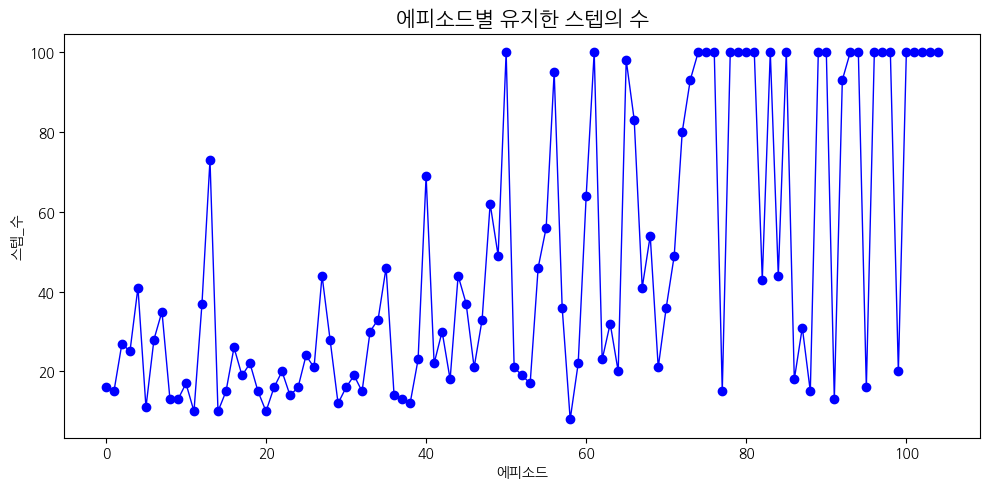

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(스텝_저장, "bo-", linewidth=1)
plt.title("에피소드별 유지한 스텝의 수", fontsize=15)
plt.xlabel("에피소드"); plt.ylabel("스텝_수")

plt.tight_layout()    # 레이아웃 간격 자동 조정
plt.show()


📌[실습 7-33] 모델 성능 시각화하기

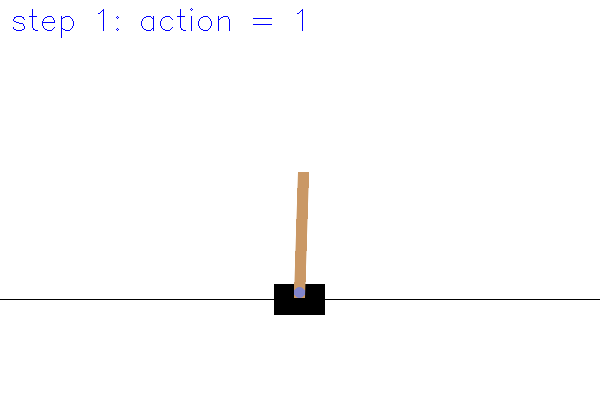

In [ ]:
import imageio
import numpy as np
import cv2  # 텍스트 삽입용
from IPython.display import Image
from tensorflow.keras.models import Sequential, load_model

test_model=load_model('학습_모델_100.keras')
env = gym.make("CartPole-v1", render_mode="rgb_array")
env = TimeLimit(env, max_episode_steps=100)

상태,_ = env.reset()
frames = []
steps=0
종료=False

while not 종료:
    # 학습된 모델로 Q값 예측
    Q = test_model.predict(상태.reshape(1,-1), verbose=0)
    행동 = np.argmax(Q)  # 가장 큰 Q값을 가지는 행동 선택
    상태, 보상, terminated, truncated, info = env.step(행동)
    종료= terminated or truncated
    frame = env.render(); frame = frame.copy()

    텍스트_삽입=cv2.putText(
        frame.copy(),
        f"step {steps+1}: action = {행동}",
        org=(10, 30),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=1,color=(0, 0, 255),thickness=1 )
    frames.append(텍스트_삽입)
    steps=steps+1

env.close()
imageio.mimsave("모형_성능_100.gif", frames, duration=0.1) # GIF 저장
Image(filename="모형_성능_100.gif") # 코랩에 출력